In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [75]:
Arushi_df = pd.read_excel('/content/ECOMM DATA.xlsx')
Arushi_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [76]:
df= Arushi_df.copy()

In [9]:
df.shape

(51290, 24)

In [10]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Since most of postal code data is empty , we will remove the column

In [11]:
df = df.drop(columns=['Postal Code'])

In [12]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [17]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296810


#Months when most orders were placed

In [18]:
df['Order Month'] = pd.to_datetime(df['Order Date']).dt.month
monthly_orders = df.groupby('Order Month')['Order ID'].count().reset_index(name='Total Orders')
top_3_months = monthly_orders.sort_values(by='Total Orders', ascending=False).head(3)
# top 3 months with most orders
print(top_3_months)


    Order Month  Total Orders
10           11          6342
11           12          6302
8             9          5975


#country and regions which had most sales

In [64]:
most_sales_country = df.groupby('Country')['Order ID'].count().sort_values(ascending=False).head(10)
most_sales_region = df.groupby('Region')['Order ID'].count().sort_values(ascending=False).head(10)

In [65]:
most_sales_country

Country
United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: Order ID, dtype: int64

In [66]:
most_sales_region

Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Name: Order ID, dtype: int64

country and regions which had most sales

<ipython-input-67-04d576343146>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sales_country.values, y=most_sales_country.index, palette='Set2')


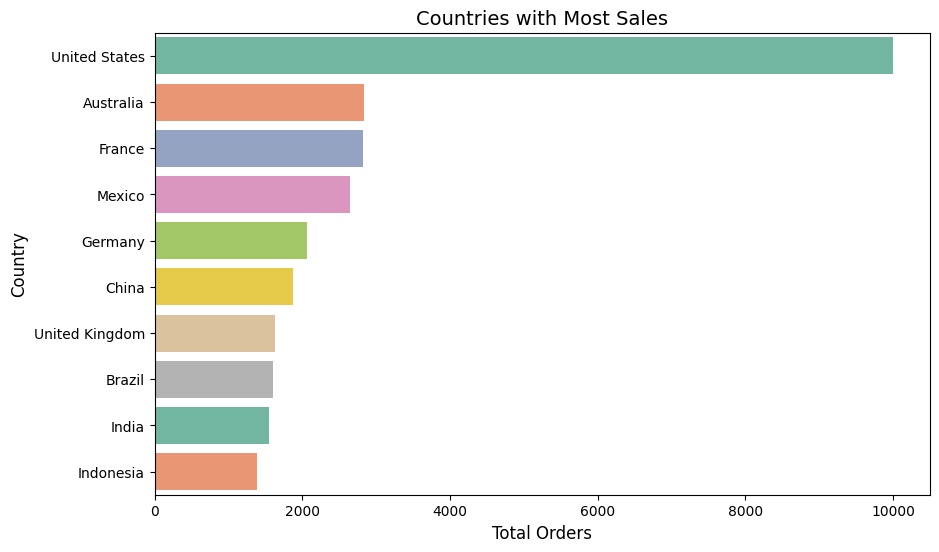

<ipython-input-67-04d576343146>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sales_region.values, y=most_sales_region.index, palette='Set1')


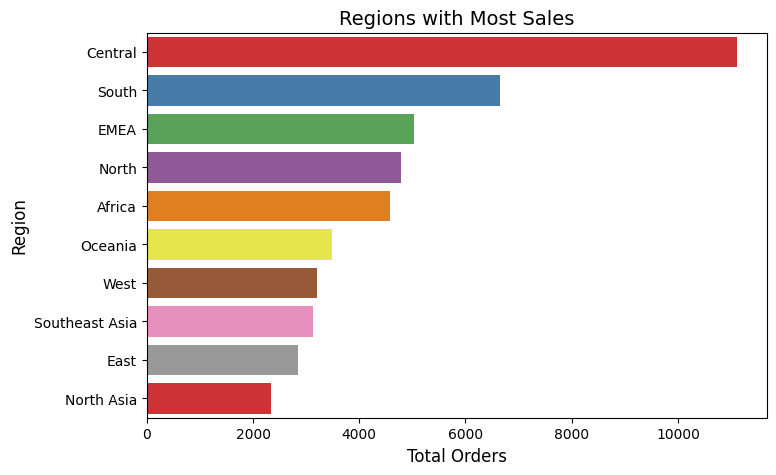

In [67]:
# Visualize countries with most sales
plt.figure(figsize=(10, 6))
sns.barplot(x=most_sales_country.values, y=most_sales_country.index, palette='Set2')
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Countries with Most Sales', fontsize=14)
plt.show()

# Visualize regions with most sales
plt.figure(figsize=(8, 5))
sns.barplot(x=most_sales_region.values, y=most_sales_region.index, palette='Set1')
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Regions with Most Sales', fontsize=14)
plt.show()

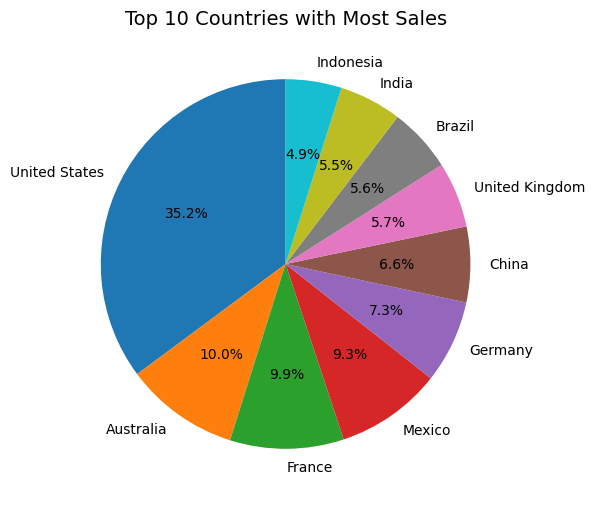

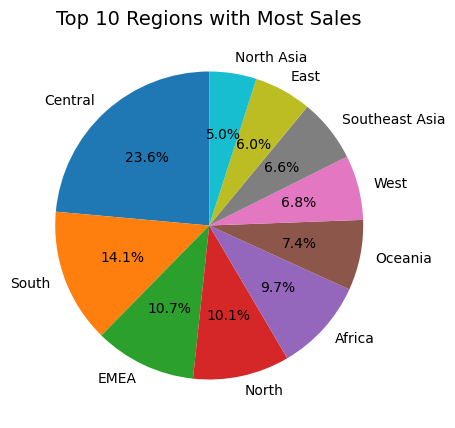

In [68]:
top_10_countries = most_sales_country.head(10)

# Create a pie chart for top 10 countries
plt.figure(figsize=(10, 6))
plt.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with Most Sales', fontsize=14)
plt.show()

top_10_regions = most_sales_region.head(10)

# Create a pie chart for top 10 regions
plt.figure(figsize=(8, 5))
plt.pie(top_10_regions.values, labels=top_10_regions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Regions with Most Sales', fontsize=14)
plt.show()

#Group sales by month

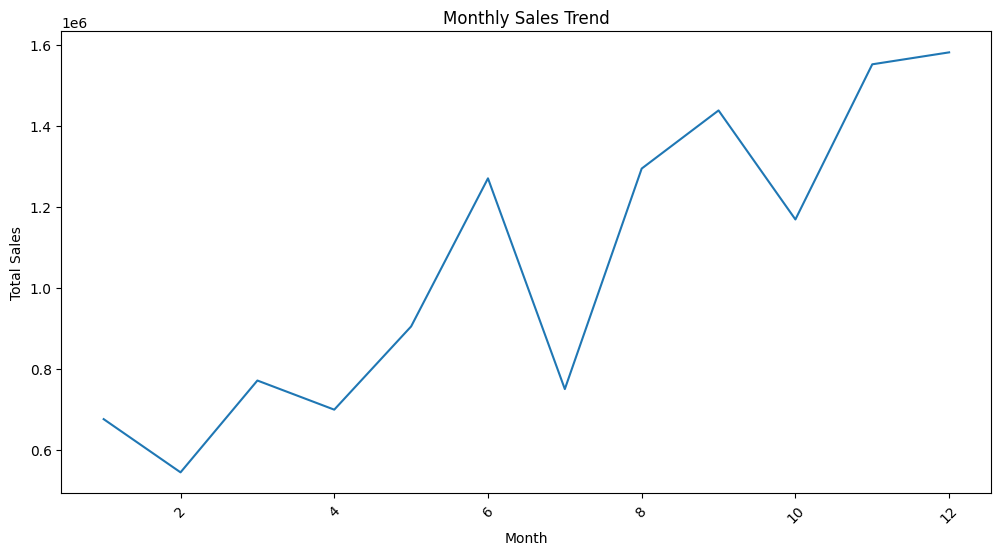

In [21]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Order Month', y='Sales')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)
plt.show()

#Group sales by year

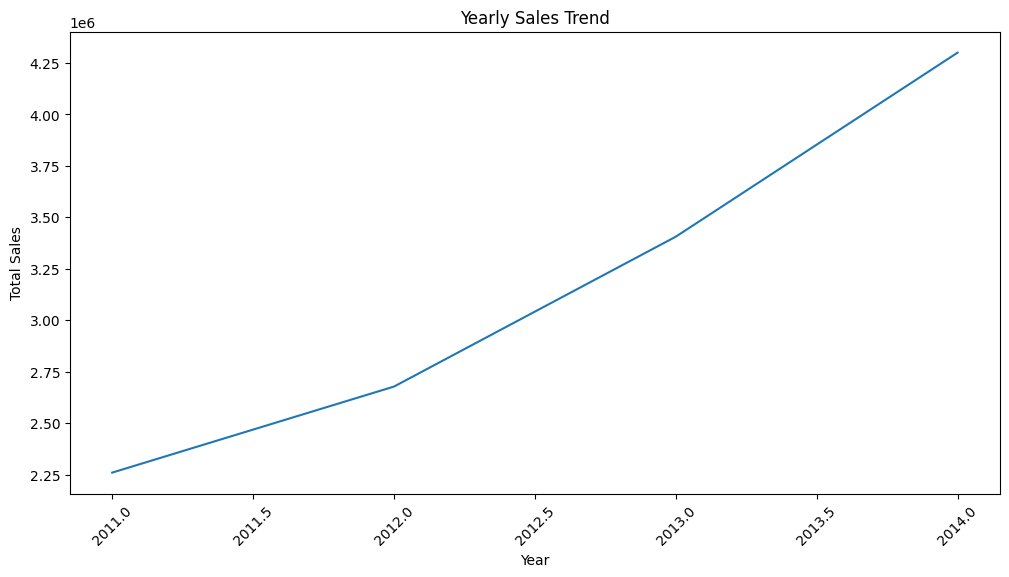

In [23]:
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Order Year', y='Sales')

plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)
plt.show()

#Top products

By Quantity

In [15]:
boughts = df.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:15]
boughts

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color'),
  Text(10, 0, 'Acco Index Tab, Clear'),
  Text(11, 0, 'Boston Pencil Sharpener, Water Color'),
  Text(12, 0, 'Tenex File Cart, Single Width'),
  Text(13, 0, 'Binney & Smith Pencil Sharpener, Water Color'),
  Text(14, 0, 'Sanford Pencil Sharpener, Easy-Erase')])

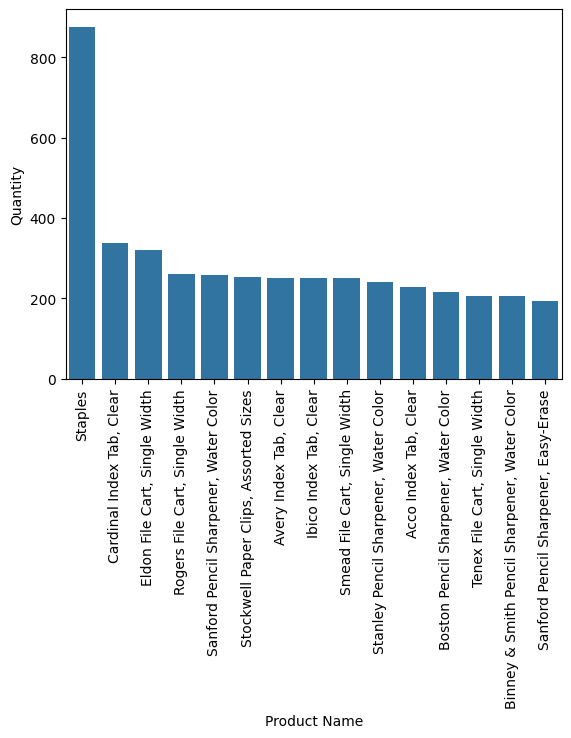

In [24]:
sns.barplot(x='Product Name',y='Quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

Most Selling Products

In [27]:
Bestsales = df.groupby('Product Name').agg({'Sales': 'sum'}).sort_values('Sales',ascending=False)[:15]
Bestsales

,Sales
Product Name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


Most profitable products

In [28]:
Bestprofit = df.groupby('Product Name').agg({'Profit': 'sum'}).sort_values('Profit',ascending=False)[:15]
Bestprofit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.92800
"Cisco Smart Phone, Full Size",17238.52060
"Motorola Smart Phone, Full Size",17027.11300
"Hoover Stove, Red",11807.96900
"Sauder Classic Bookcase, Traditional",10672.07300
"Harbour Creations Executive Leather Armchair, Adjustable",10427.32600
"Nokia Smart Phone, Full Size",9938.19550
"Cisco Smart Phone, with Caller ID",9786.64080
"Nokia Smart Phone, with Caller ID",9465.32570


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB'),
  Text(10, 0, 'Hewlett Wireless Fax, High-Speed'),
  Text(11, 0, 'Canon Wireless Fax, Laser'),
  Text(12, 0, 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
  Text(13, 0, 'Memorex Router, Erganomic'),
  Text(14, 0, 'SAFCO Executive Leather Armchair, Black')])

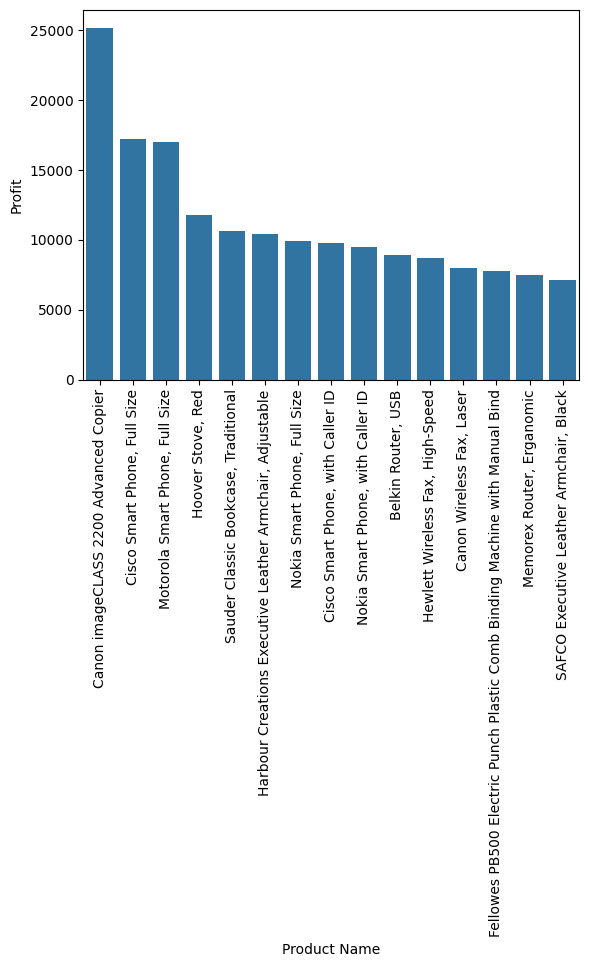

In [29]:
sns.barplot(x='Product Name',y='Profit',data=Bestprofit.head(15).reset_index())
plt.xticks(rotation = 'vertical')

Most sold category

In [34]:
most_sold_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(10)

#print(f"Most sold category: {most_sold_category.index[0]}, Total quantity sold: {most_sold_category.values[0]}")
most_sold_category

Category
Office Supplies    108182
Technology          35176
Furniture           34954
Name: Quantity, dtype: int64

In [36]:
sub_categories_sales = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Sub-Categories with Most Sales:")
sub_categories_sales

Top 5 Sub-Categories with Most Sales:


Sub-Category
Binders    21429
Storage    16917
Art        16301
Paper      12822
Chairs     12336
Name: Quantity, dtype: int64

Most profitable Category

In [39]:
most_profitable_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).head(3)
most_profitable_category

Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

Sales by Category and Sub-Category

In [43]:
category_sub_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()

print("Total Sales by Category and Sub-Category:")
category_sub_sales

Total Sales by Category and Sub-Category:


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,1.466572e+06,1.501682e+06,NaN,NaN,NaN,385578.2559,NaN,NaN,NaN,NaN,NaN,NaN,757041.9244
Office Supplies,NaN,1011064.305,372091.9659,461911.5057,NaN,NaN,NaN,170904.3016,83242.3159,NaN,73404.03,NaN,244291.7194,NaN,1.127086e+06,243074.2206,NaN
Technology,749237.0185,NaN,NaN,NaN,NaN,NaN,1.509436e+06,NaN,NaN,NaN,NaN,779060.0671,NaN,1.706824e+06,NaN,NaN,NaN


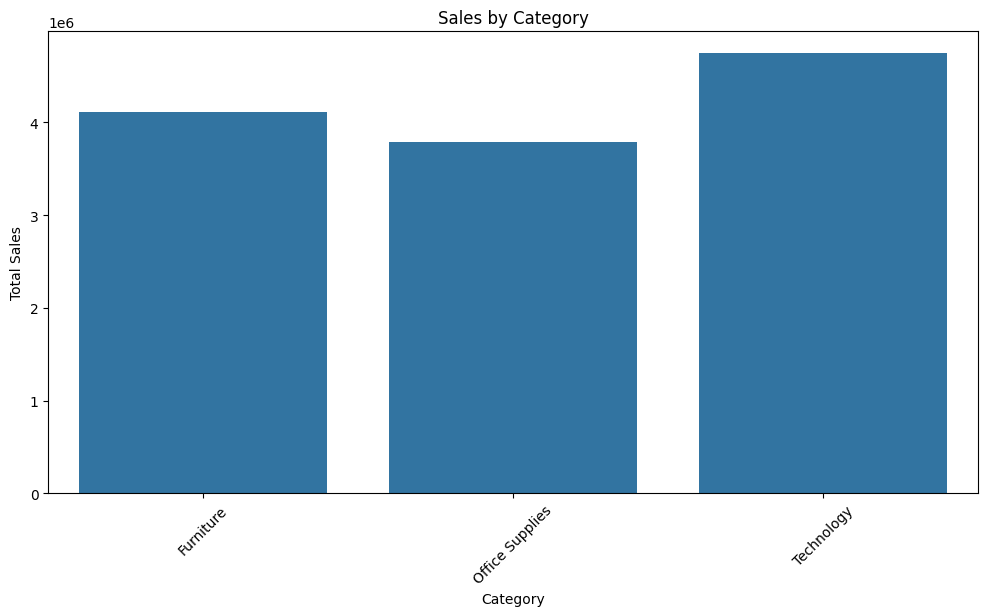

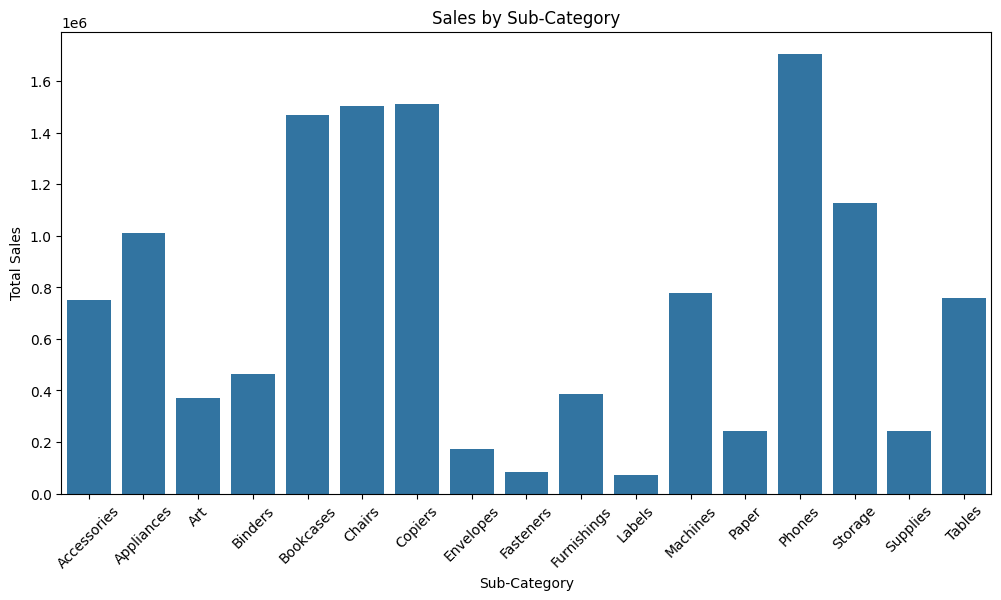

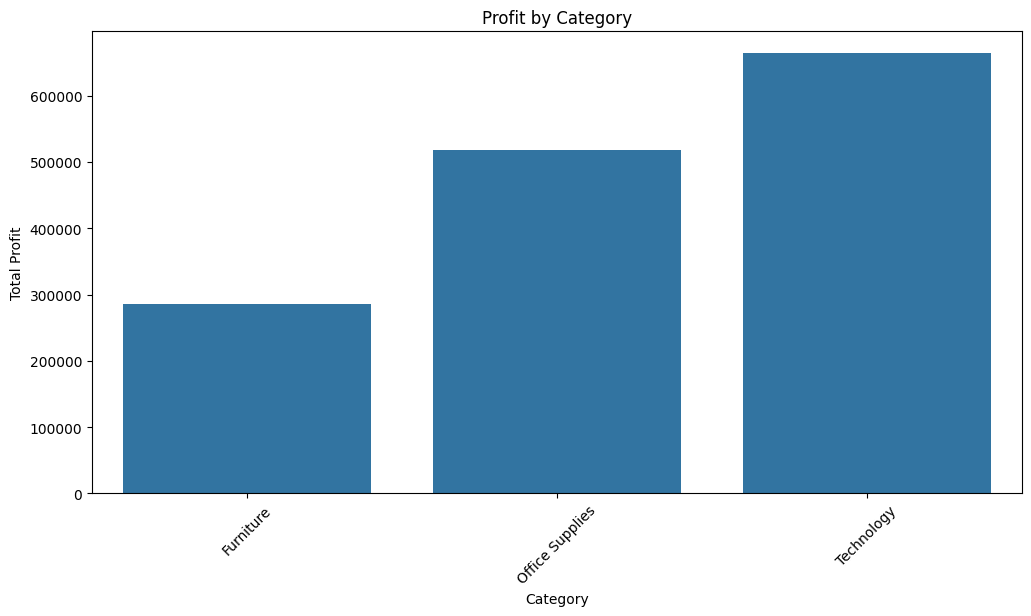

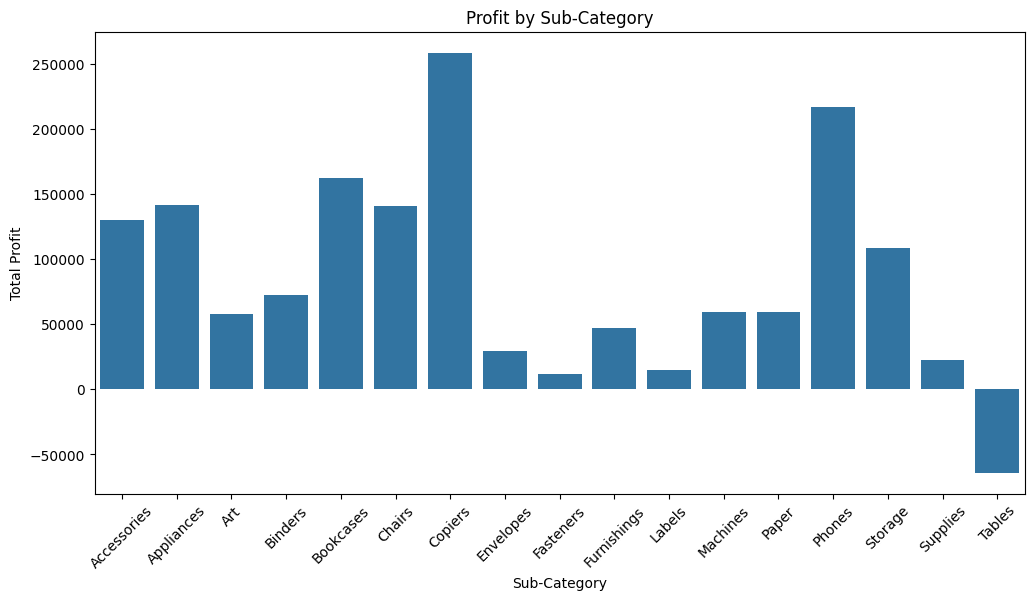

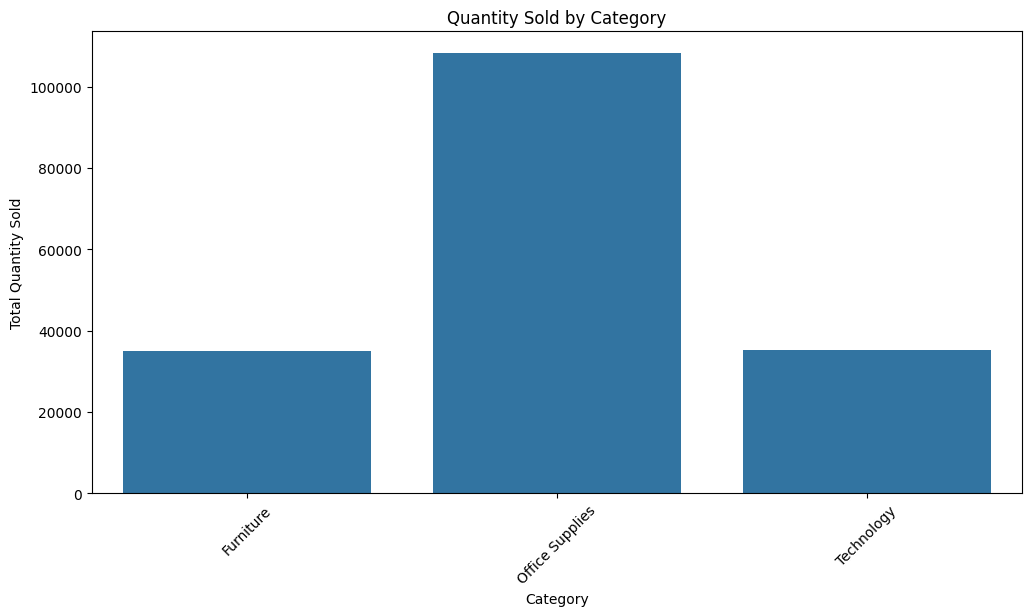

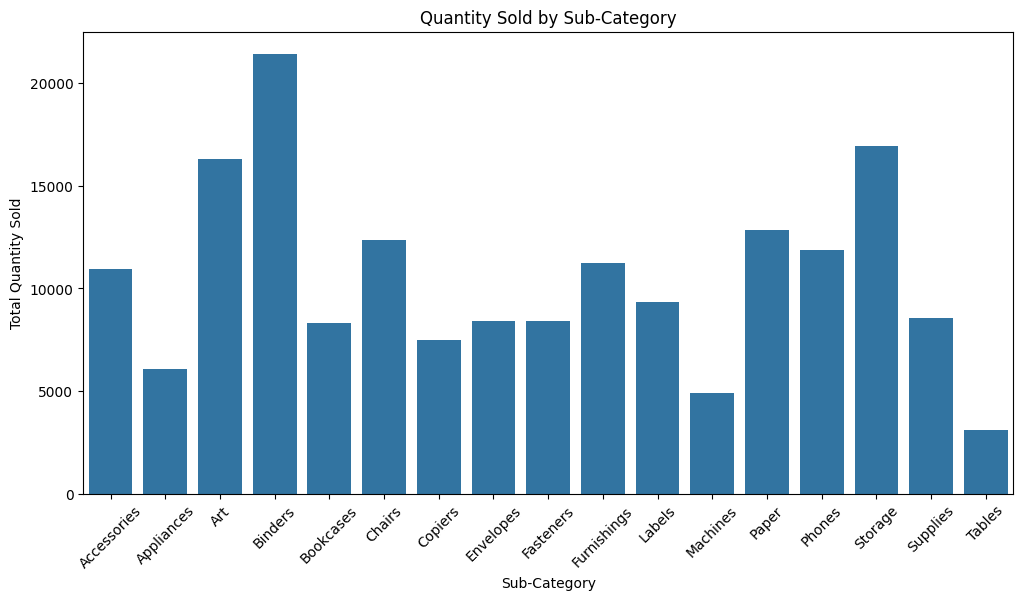

In [40]:
# Category vs Sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sub-Category vs Sales
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Category vs Profit
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

# Sub-Category vs Profit
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

# Category vs Quantity
category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Quantity', data=category_quantity)
plt.title('Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Sub-Category vs Quantity
subcategory_quantity = df.groupby('Sub-Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Quantity', data=subcategory_quantity)
plt.title('Quantity Sold by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


In [44]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False).head(3)

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

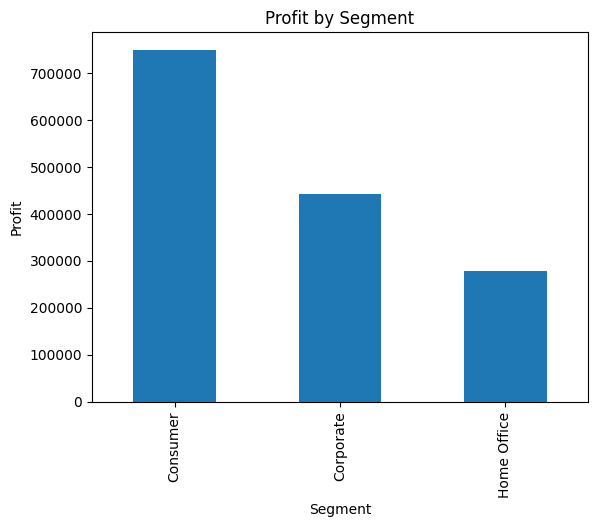

In [45]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False).head(3).plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit by Segment')
plt.show()

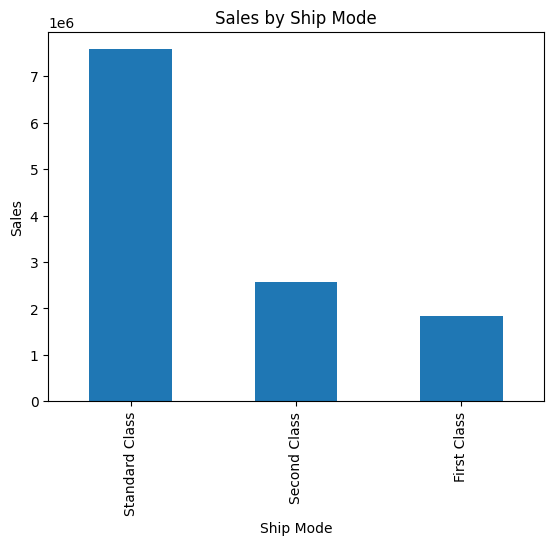

In [50]:
most_sold_ship_mode = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).head(3)
most_sold_ship_mode
df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).head(3).plot(kind='bar')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.title('Sales by Ship Mode')
plt.show()

Visualize the 'Category' column from the Shipmode column dataset standpoints.

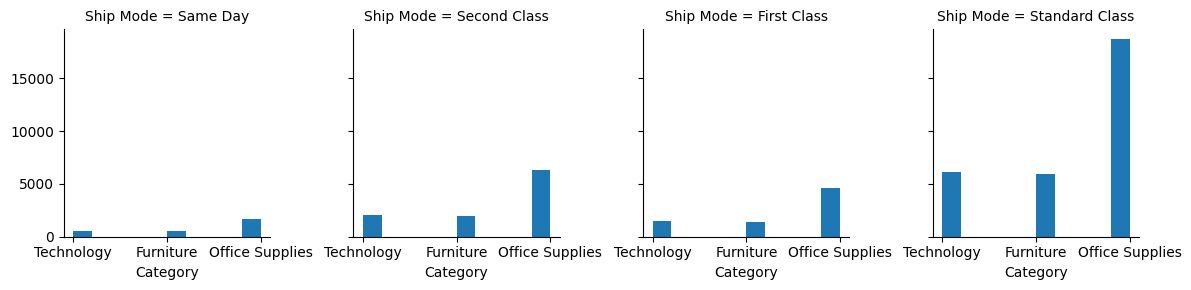

In [51]:
category_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')

Market selling most products

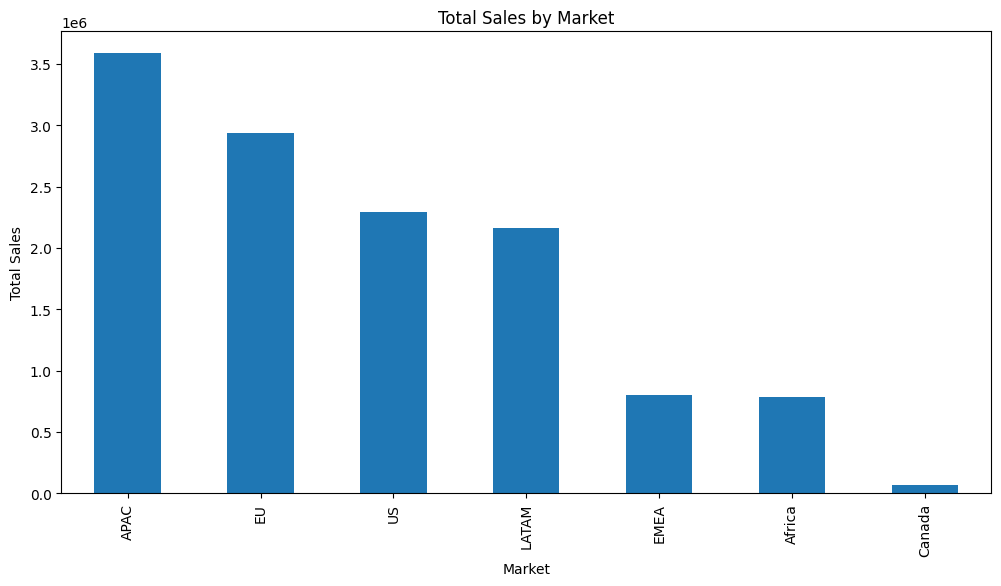

In [53]:
plt.figure(figsize=(12, 6))
df.groupby('Market')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.title('Total Sales by Market')
plt.show()

most profitable market

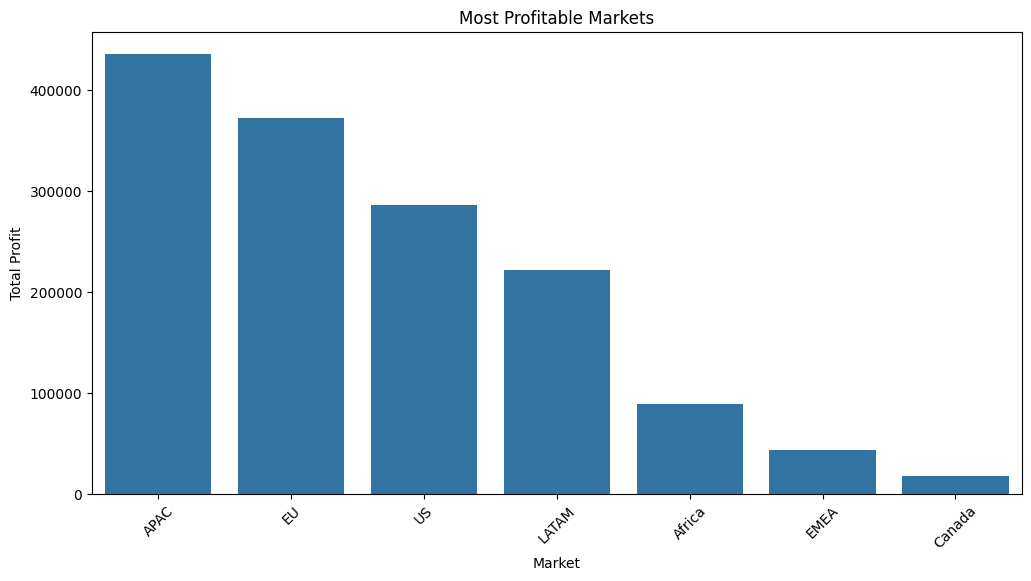

In [57]:

most_profitable_market = df.groupby('Market')['Profit'].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_profitable_market.index, y=most_profitable_market.values)

plt.title('Most Profitable Markets')
plt.xlabel('Market')
plt.ylabel('Total Profit')

plt.xticks(rotation=45)
plt.show()


In [71]:
top_5_profitable_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

print("Top 10 Most Profitable Customers:")
top_5_profitable_customers


Top 10 Most Profitable Customers:


Customer Name
Tamara Chand       8672.89890
Raymond Buch       8453.04950
Sanjit Chand       8205.37990
Hunter Lopez       7816.56778
Bill Eplett        7410.00530
Harry Marie        6958.28640
Susan Pistek       6484.40726
Mike Gockenbach    6458.67620
Adrian Barton      6417.28450
Tom Ashbrook       6311.97910
Name: Profit, dtype: float64

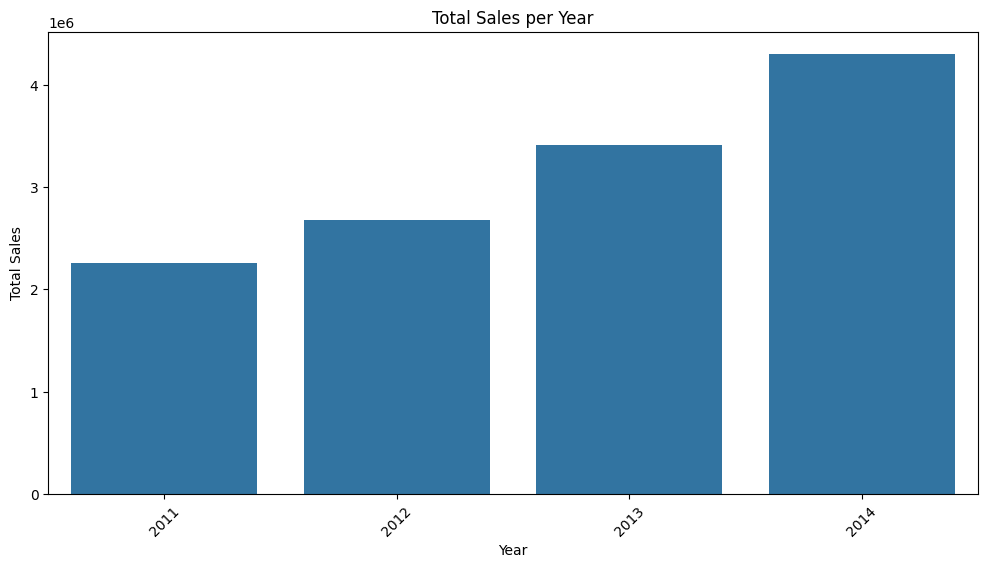

In [73]:
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year
yearly_sales = df.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)

# Add labels and title to the chart.
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales per Year')


plt.xticks(rotation=45)
plt.show()
